## Using WhyLogs to Profile Images
---

This notebook provides an example how you can use whylogs to profile unstructure data like images.

In [1]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns

withd :	300
height:	225
number of pixels:67500


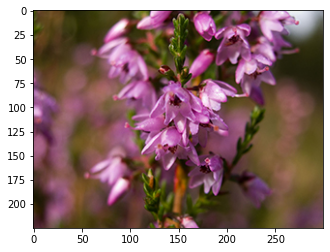

In [2]:
with open("../testdata/images/flower2.jpg","rb") as img_f:
    img= Image.open(img_f)
    imshow(np.asarray(img))
    w,h = img.size
    total_num_pixels= w*h
    print("withd :\t{}\nheight:\t{}\nnumber of pixels:{}".format(w,h,total_num_pixels))

In [3]:
from whylogs import get_or_create_session

In [4]:
_session=None
session = get_or_create_session()
logger=session.logger("image_dataset2")
logger.log_image(os.path.join(
    "..","testdata", "images", "flower2.jpg"))
profile=logger.profile

imageProfiles = profile.flat_summary()["hist"]

print(imageProfiles["Saturation"])
print(profile.flat_summary()["summary"]["column"])

WARN: Missing config
{'bin_edges': [0.0, 8.50000085, 17.0000017, 25.500002549999998, 34.0000034, 42.500004249999996, 51.000005099999996, 59.500005949999995, 68.0000068, 76.50000764999999, 85.00000849999999, 93.50000935, 102.00001019999999, 110.50001104999998, 119.00001189999999, 127.50001275, 136.0000136, 144.50001444999998, 153.00001529999997, 161.50001615, 170.00001699999999, 178.50001784999998, 187.0000187, 195.50001955, 204.00002039999998, 212.50002124999997, 221.00002209999997, 229.50002295, 238.00002379999998, 246.50002464999997, 255.0000255], 'counts': [64, 512, 384, 256, 512, 776, 656, 1008, 1328, 2710, 4380, 5612, 5522, 6026, 4732, 4620, 4056, 4000, 2876, 3538, 2450, 2460, 1570, 1158, 908, 682, 744, 808, 704, 2448]}
0                                 X-Resolution
1                                   Saturation
2                                  ImageLength
3                                 ExposureTime
4                                        Flash
5                             

## Custom Functions
---


In [7]:
PIL.Image
class AvgValue:
    
    def __call__(self, x):
        return np.mean(np.array(x)).reshape(-1,1)
    def __repr__(self,):
        return self.__class__.__name__
    
mylamdda =(lambda x: np.mean(x,axis=1).reshape(-1,1))

In [8]:
class MyBlue:
    def __call__(self, x):
        _,_,b= x.split()
        return np.array(b).reshape(-1,1)
    def __repr__(self,):
        return self.__class__.__name__

```
[ 123,34,343,43,54]-> 
[ 
[123],
[34],
[343]
]
```

In [11]:
from whylogs.features.transforms import ComposeTransforms, Brightness,Saturation
_session=None
session = get_or_create_session()
logger2=session.logger("image_dataset_custome_1")

logger2.log_image(os.path.join(
    "..","testdata", "images", "flower2.jpg"),
                 feature_transforms = [ AvgValue(), MyBlue(), ComposeTransforms([MyBlue(),AvgValue()])],  feature_name="Pipe1_")

profile2=logger2.profile

imageProfiles2 = profile2.flat_summary()["hist"]
print(imageProfiles2)
print(profile2.flat_summary()["summary"]["column"])

{'Pipe1ImageWidth': {'bin_edges': [1733.0, 1733.0001733], 'counts': [3]}, 'Pipe1ImageLength': {'bin_edges': [1300.0, 1300.00013], 'counts': [3]}, 'Pipe1ResolutionUnit': {'bin_edges': [2.0, 2.0000002], 'counts': [3]}, 'Pipe1_ImageWidth': {'bin_edges': [1733.0, 1733.0001733], 'counts': [6]}, 'Pipe1_(MyBlue->AvgValue)': {'bin_edges': [77.1590805053711, 77.15908822127915], 'counts': [2]}, 'Pipe1_ResolutionUnit': {'bin_edges': [2.0, 2.0000002], 'counts': [6]}, 'Pipe1AvgValue': {'bin_edges': [90.8436279296875, 90.84363701405029], 'counts': [1]}, 'Pipe1_Orientation': {'bin_edges': [1.0, 1.0000001], 'counts': [6]}, 'Pipe1_ImageLength': {'bin_edges': [1300.0, 1300.00013], 'counts': [6]}, 'Pipe1MyBlue': {'bin_edges': [0.0, 8.50000085, 17.0000017, 25.500002549999998, 34.0000034, 42.500004249999996, 51.000005099999996, 59.500005949999995, 68.0000068, 76.50000764999999, 85.00000849999999, 93.50000935, 102.00001019999999, 110.50001104999998, 119.00001189999999, 127.50001275, 136.0000136, 144.5000144

## Check histograms from PIL

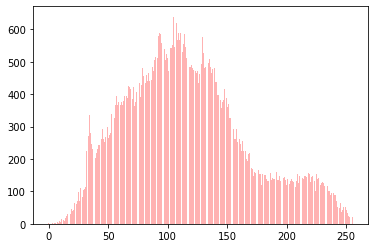

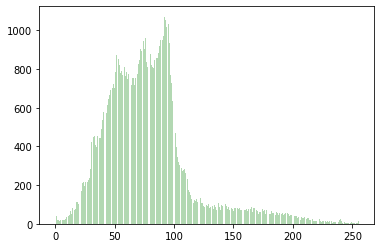

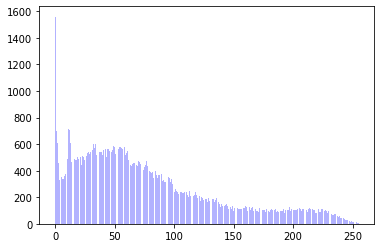

In [9]:
from PIL import Image
import matplotlib.pyplot as plot
def RED(R): return '#%02x%02x%02x'%(R,0,0)
def GREEN(G): return '#%02x%02x%02x'%(0,G,0)
def BLUE(B):return '#%02x%02x%02x'%(0,0,B)
i=Image.open("../testdata/images/flower2.jpg")
hst=i.histogram()
Red=hst[0:256]      # indicates Red
Green=hst[256:512]  # indicated Green
Blue=hst[512:768]   # indicates Blue
plt.figure(0)             # plots a figure to display RED Histogram
for i in range(0, 256):
    plt.bar(i, Red[i], color = 'r',alpha=0.3)
plt.figure(1)             # plots a figure to display GREEN Histogram
for i in range(0, 256):
    plt.bar(i, Green[i], color ='g',alpha=0.3)
plt.figure(2)             # plots a figure to display BLUE Histogram
for i in range(0, 256):
    plt.bar(i, Blue[i], color = 'b',alpha=0.3)
plt.show()

In [12]:
session = get_or_create_session()
logger3=session.logger("image_dataset_compose")
logger3.log_image(os.path.join(
    "..","testdata", "images", "flower2.jpg"))

logger3.log_image(os.path.join(
    "..","testdata", "images", "flower2.jpg"),feature_transforms = [ComposeTransforms([Brightness(), AvgValue()])],metadata_attribute
profile3=logger3.profile
print(profile3.flat_summary()["summary"]["column"])

0                      Software
1                       Quality
2                  ExposureTime
3                    ImageWidth
4                   Compression
5               SamplesPerPixel
6                  Y-Resolutoin
7                   Orientation
8               BrightnessValue
9                         Flash
10                          Hue
11                        Model
12               ResolutionUnit
13    PhotometricInterpretation
14                   Saturation
15                 RowsPerStrip
16                   Brightness
17                BitsPerSample
18       (Brightness->AvgValue)
19                  ImageLength
20                 X-Resolution
Name: column, dtype: object


In [15]:
minnpf = np.frompyfunc(lambda x, y: min(x,y), 2, 1)
maxnpf = np.frompyfunc(lambda x, y: max(x,y), 2, 1)


def get_custom_histogram_info(profiles, variable, n_bins):
    summaries = [profile.flat_summary()["summary"] for profile in profiles]
    min_range= minnpf.accumulate([ summary[summary["column"]==variable]["min"].values[0] for summary in summaries], dtype=np.object).astype(np.int)
    max_range= maxnpf.accumulate([ summary[summary["column"]==variable]["max"].values[0] for summary in summaries], dtype=np.object).astype(np.int)
    
    bins = np.linspace(int(min_range), int(max_range), int((max_range-min_range)/n_bins))

    counts= [ profile.columns[variable].number_tracker.histogram.get_pmf(bins[:-1]) for profile in profiles]
    return bins, counts


def plot_distribution_shift(profiles, variable, n_bins):
    """Visualization for distribution shift"""
    
    bins, counts = get_custom_histogram_info(profiles, variable, n_bins)

    fig, ax = plt.subplots(figsize=(10, 3))
    for idx, profile in enumerate(profiles):
        sns.histplot(x=bins, weights=counts[idx], bins=n_bins, 
                 label=profile.name, alpha=0.7, ax=ax)
   
    ax.legend()
    plt.show()


In [17]:
plot_distribution_shift([profile2,profile3],"Avg",10)

NameError: name 'profile3' is not defined

/Users/leandro/Dropbox/Whylab/projects/whylogs-python/src/whylogs/core/statistics/datatypes/variancetracker.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return self.sum / (self.count - 1)


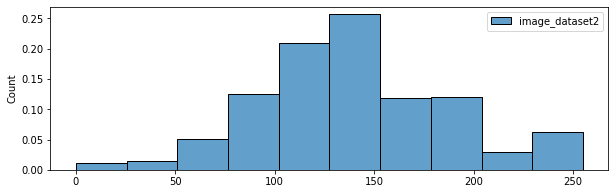

In [15]:
plot_distribution_shift([profile],"Saturation",10)